In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.4-tf


In [14]:
train_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train/cats"
train_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train/dogs"
test_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test/cats"
test_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test/dogs"
validation_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation/cats"
validation_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation/dogs"

In [15]:
print('Total number of cat images for training:',len(os.listdir(train_cats_dir)))
print('Total number of dog images for training:',len(os.listdir(train_dogs_dir)))
print('Total number of cat images for test:',len(os.listdir(test_cats_dir)))
print('Total number of dog images for test:',len(os.listdir(test_dogs_dir)))
print('Total number of cat images for validation:',len(os.listdir(validation_cats_dir)))
print('Total number of dog images for validation:',len(os.listdir(validation_dogs_dir)))

Total number of cat images for training: 1000
Total number of dog images for training: 1000
Total number of cat images for test: 250
Total number of dog images for test: 250
Total number of cat images for validation: 250
Total number of dog images for validation: 250


In [16]:
from keras.applications import ResNet50
myResNet=ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(224,224,3))

In [6]:
myResNet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(myResNet)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu', input_dim=1*1*2048))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
train_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train"
test_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test"
validation_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation"

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 284s - loss: 0.1621 - acc: 0.9440 - val_loss: 0.7981 - val_acc: 0.4960
Epoch 2/30
100/100 [==============================] - 50s - loss: 0.0802 - acc: 0.9700 - val_loss: 0.7168 - val_acc: 0.4970
Epoch 3/30
100/100 [==============================] - 51s - loss: 0.0798 - acc: 0.9745 - val_loss: 1.0160 - val_acc: 0.5030
Epoch 4/30
100/100 [==============================] - 51s - loss: 0.0705 - acc: 0.9765 - val_loss: 0.7469 - val_acc: 0.5320
Epoch 5/30
100/100 [==============================] - 51s - loss: 0.0487 - acc: 0.9860 - val_loss: 2.3353 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 52s - loss: 0.0582 - acc: 0.9775 - val_loss: 1.6358 - val_acc: 0.5960
Epoch 7/30
100/100 [==============================] - 51s - loss: 0.0333 - acc: 0.9900 - val_loss: 1.5910 - val_acc: 0.7320
Epoch 8/30
100/100 [==============================] - 52s - loss: 0.0287 - acc: 0.9905 - val_loss: 0.8739 - val_acc: 0.8640
Epoch 9

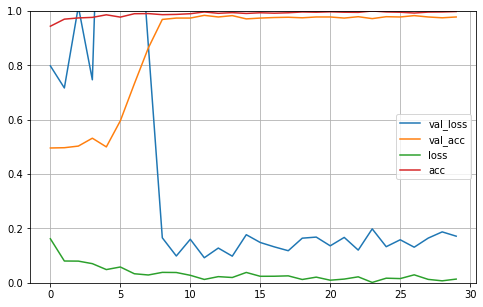

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 500 images belonging to 2 classes.


In [33]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.9959999990463256
